<a href="https://colab.research.google.com/github/Deepapoudel/MLworkshop_heartfailureprediction/blob/main/Deepa_Poudel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dipapoudel
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 21.8MB/s]

In [ ]:
import pandas as pd
data = pd.read_csv("/content/heart-failure-prediction/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
data.shape


(918, 12)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.columns.to_list()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [ ]:
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)


In [ ]:
data.duplicated().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='Count'>

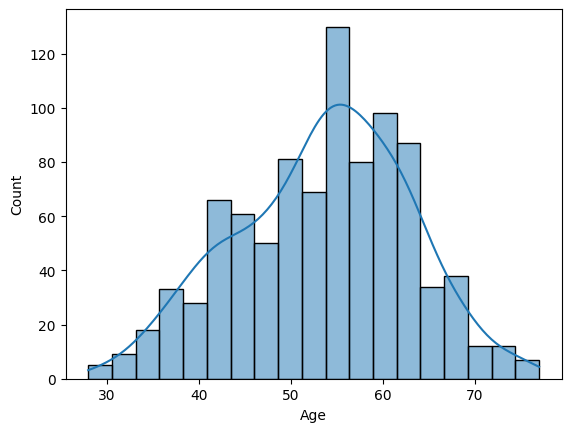

In [ ]:
sns.histplot(data['Age'],kde=True)

In [ ]:
y = data['HeartDisease']
X = data[['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [ ]:
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for random forest
validation = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Logistic validation:", validation)
print("Mean validation Accuracy:", np.mean(validation))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic validation: [0.84782609 0.8423913  0.8423913  0.86338798 0.76502732]
Mean CV Accuracy: 0.8322047992397245


In [ ]:
clf  = RandomForestClassifier(n_estimators = 100, random_state= 42)
clf.fit(X_train, y_train)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance
importance = clf.feature_importances_
feature_imp_data = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importance})
feature_imp_data = feature_imp_data.sort_values('Gini Importance', ascending=False)
print(feature_imp_data)

              Feature  Gini Importance
14        ST_Slope_Up         0.160468
13      ST_Slope_Flat         0.112324
4               MaxHR         0.109152
5             Oldpeak         0.108339
2         Cholesterol         0.101684
0                 Age         0.094156
12   ExerciseAngina_Y         0.093601
1           RestingBP         0.072677
7   ChestPainType_ATA         0.035199
6               Sex_M         0.031340
8   ChestPainType_NAP         0.026045
3           FastingBS         0.022267
10  RestingECG_Normal         0.015578
11      RestingECG_ST         0.010932
9    ChestPainType_TA         0.006240


/tmp/ipython-input-3583613442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gini Importance', y='Feature', data=feature_imp_data, palette='viridis')


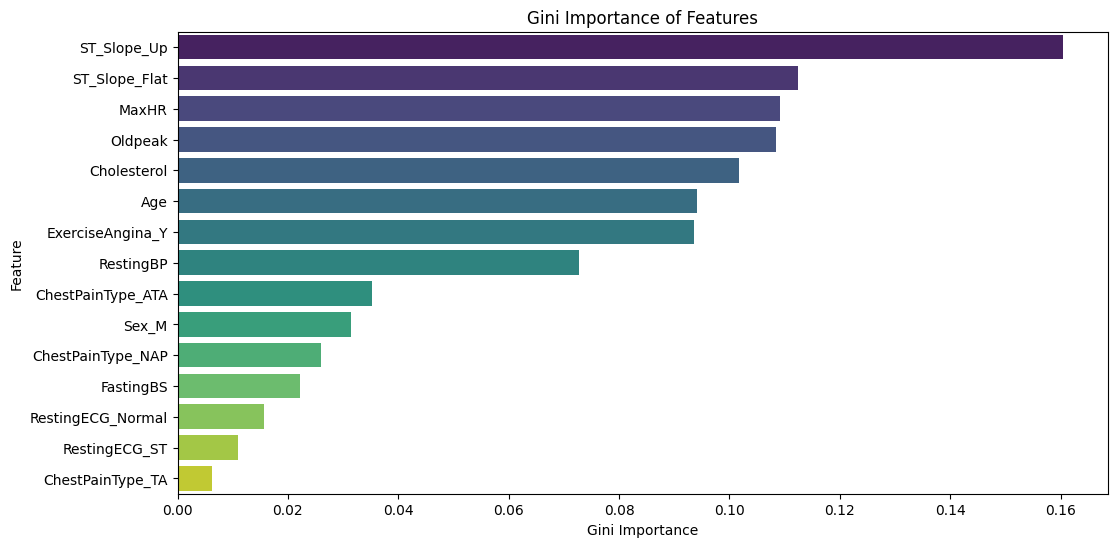

In [ ]:
# visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Gini Importance', y='Feature', data=feature_imp_data, palette='viridis')
plt.title('Gini Importance of Features')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for random forest
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Random Forest CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Random Forest CV Accuracy Scores: [0.85869565 0.83152174 0.83695652 0.81420765 0.7431694 ]
Mean CV Accuracy: 0.8169101924447613


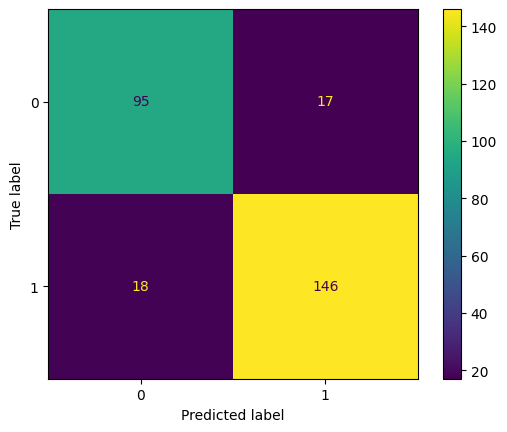

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()
